In [24]:
!unzip body_parts_2.zip


Archive:  body_parts_2.zip
   creating: body_parts_1/
   creating: body_parts_1/train/
   creating: body_parts_1/train/ear/
  inflating: body_parts_1/train/ear/images__10_.jpeg  
  inflating: body_parts_1/train/ear/images__11_.jpeg  
  inflating: body_parts_1/train/ear/images__15_.jpeg  
  inflating: body_parts_1/train/ear/images__16_.jpeg  
  inflating: body_parts_1/train/ear/images__17_.jpeg  
  inflating: body_parts_1/train/ear/images__18_.jpeg  
  inflating: body_parts_1/train/ear/images__19_.jpeg  
  inflating: body_parts_1/train/ear/images__1_.jpeg  
  inflating: body_parts_1/train/ear/images__21_.jpeg  
  inflating: body_parts_1/train/ear/images__22_.jpeg  
  inflating: body_parts_1/train/ear/images__23_.jpeg  
  inflating: body_parts_1/train/ear/images__24_.jpeg  
  inflating: body_parts_1/train/ear/images__25_.jpeg  
  inflating: body_parts_1/train/ear/images__26_.jpeg  
  inflating: body_parts_1/train/ear/images__27_.jpeg  
  inflating: body_parts_1/train/ear/images__28_.jpeg

In [2]:
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import ELU
from keras.layers.core import Activation, Flatten, Dropout, Dense

Using TensorFlow backend.


In [26]:
img_rows, img_cols = 64, 64
batch_size = 5

num_classes = 5
train_data_dir = './body_parts_1/train'
validation_data_dir = './body_parts_1/validation'

# Let's use some data augmentaiton 
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=50,
      horizontal_flip=True,
      vertical_flip=True,
      fill_mode='nearest')
 
validation_datagen = ImageDataGenerator(rescale=1./255)
 
train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=True)
 
validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=True)

Found 250 images belonging to 5 classes.
Found 110 images belonging to 5 classes.


In [27]:
model = Sequential()

# Block #1: first CONV => ELU => CONV => ELU => POOL
# layer set
model.add(Conv2D(64, (3, 3), padding="same", kernel_initializer="he_normal",
                input_shape = (img_rows, img_cols, 3)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), padding="same", kernel_initializer="he_normal",
                input_shape = (img_rows, img_cols, 3)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Block #2: second CONV => ELU => CONV => ELU => POOL
# layer set
model.add(Conv2D(128, (3, 3), padding="same", kernel_initializer="he_normal"))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), padding="same", kernel_initializer="he_normal"))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Block #3: third CONV => ELU => CONV => ELU => POOL
# layer set
model.add(Conv2D(256, (3, 3), padding="same", kernel_initializer="he_normal"))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3), padding="same", kernel_initializer="he_normal"))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Block #4: fourth CONV => ELU => CONV => ELU => POOL
# layer set
model.add(Conv2D(512, (3, 3), padding="same", kernel_initializer="he_normal"))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(512, (3, 3), padding="same", kernel_initializer="he_normal"))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Block #5: first set of FC => ELU layers
model.add(Flatten())
model.add(Dense(64, kernel_initializer="he_normal"))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

# Block #6: second set of FC => ELU layers
model.add(Dense(64, kernel_initializer="he_normal"))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

# Block #7: softmax classifier
model.add(Dense(num_classes, kernel_initializer="he_normal"))
model.add(Activation("softmax"))

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_49 (Conv2D)           (None, 64, 64, 64)        1792      
_________________________________________________________________
activation_67 (Activation)   (None, 64, 64, 64)        0         
_________________________________________________________________
batch_normalization_61 (Batc (None, 64, 64, 64)        256       
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 64, 64, 64)        36928     
_________________________________________________________________
activation_68 (Activation)   (None, 64, 64, 64)        0         
_________________________________________________________________
batch_normalization_62 (Batc (None, 64, 64, 64)        256       
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 32, 32, 64)        0         
__________

In [29]:
from keras.optimizers import RMSprop, SGD, Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

                     
checkpoint = ModelCheckpoint("/content/body_parts.h5",
                             monitor="val_loss",
                             mode="min",
                             save_best_only = True,
                             verbose=1)

earlystop = EarlyStopping(monitor = 'val_loss', 
                          min_delta = 0, 
                          patience = 5,
                          verbose = 1,
                          restore_best_weights = True)

reduce_lr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.2, patience = 3, verbose = 1, min_delta = 0.0001)

# we put our call backs into a callback list
callbacks = [checkpoint, reduce_lr]

# We use a very small learning rate 
model.compile(loss = 'categorical_crossentropy',
              optimizer = Adam(lr=0.0005),
              metrics = ['accuracy'])

nb_train_samples = 250
nb_validation_samples = 110
epochs = 50

history = model.fit_generator(
    train_generator,
    steps_per_epoch = nb_train_samples // batch_size,
    epochs = epochs,
    callbacks = callbacks,
    validation_data = validation_generator,
    validation_steps = nb_validation_samples // batch_size)






Epoch 1/50
50/50 [==============================] - 8s 160ms/step - loss: 1.5999 - acc: 0.4400 - val_loss: 5.0792 - val_acc: 0.2364

Epoch 00001: val_loss improved from inf to 5.07924, saving model to /content/body_parts.h5
Epoch 2/50
50/50 [==============================] - 1s 30ms/step - loss: 1.7205 - acc: 0.4240 - val_loss: 2.2285 - val_acc: 0.4455

Epoch 00002: val_loss improved from 5.07924 to 2.22855, saving model to /content/body_parts.h5
Epoch 3/50
50/50 [==============================] - 1s 28ms/step - loss: 1.6447 - acc: 0.4160 - val_loss: 3.0106 - val_acc: 0.3818

Epoch 00003: val_loss did not improve from 2.22855
Epoch 4/50
50/50 [==============================] - 1s 28ms/step - loss: 1.3517 - acc: 0.5120 - val_loss: 2.1809 - val_acc: 0.4000

Epoch 00004: val_loss improved from 2.22855 to 2.18089, saving model to /content/body_parts.h5
Epoch 5/50
50/50 [==============================] - 1s 29ms/step - loss: 1.4345 - acc: 0.4840 - val_loss: 1.9711 - val_acc: 0.4545

Epoch 0

In [0]:
model_yaml = model.to_yaml()
with open("model.yaml", "w") as yaml_file:
    yaml_file.write(model_yaml)

foot (0.48)
hand (0.451)
eye (0.0525)


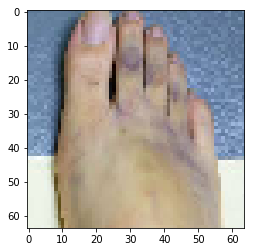

In [51]:
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from keras.models import model_from_yaml

yaml_file = open('model.yaml', 'r')
loaded_model_yaml = yaml_file.read()
yaml_file.close()
model = model_from_yaml(loaded_model_yaml)
# load weights into new model
model.load_weights("body_parts.h5")
print("Loaded model from disk")

img = image.load_img('images (25).jpeg',target_size=(64,64,3))
img = image.img_to_array(img)
img = img/255

classes = np.array(['ear','eye','foot','hand','lips'])
proba = model.predict(img.reshape(1,64,64,3))
top_3 = np.argsort(proba[0])[:-4:-1]
for i in range(3):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
plt.imshow(img)

/content
